# Load Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import os
import json

In [3]:
os.chdir("../../Dataset")

In [4]:
dataset = pd.read_csv("FeatureExtracted/dataset.csv")
# ratings = pd.read_csv("ratings_small.csv")
ratings_train = pd.read_csv("CleanedData/ratings_train.csv")
ratings_test = pd.read_csv("CleanedData/ratings_test.csv")

In [5]:
len(dataset)

2830

# Learn one user's model

In the **ratings_small.csv** There are 671 users

In [6]:
len(ratings_train['userId'].unique())

671

Lets learn model for user 22

In [7]:
user = 1

Movies and Rating user 22 rate for

In [8]:
ratings_test[ratings_test['userId']== user]
ratings_train[ratings_train['userId']== user]

,userId,movieId,rating
0,1,1371,2.5
1,1,2105,4.0
2,1,2193,2.0
3,1,2455,2.5


<AxesSubplot:>

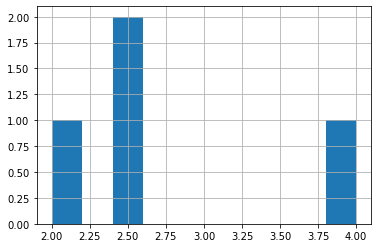

In [9]:
ratings_train[ratings_train['userId']== user]['rating'].hist()

Movies that user rates for

In [10]:
movies_test = ratings_test[ratings_test['userId']== user]['movieId'].values
movies_train = ratings_train[ratings_train['userId']== user]['movieId'].values
print(movies_train)

[1371 2105 2193 2455]


Movie Profiles (Movie that user 22 rates for only)

In [11]:
dataset[dataset['id'].isin(movies_train)]

,budget,id,runtime,revenue,vote_average,vote_count,CastsRank,NumLeadActors,HasTop50Actors,NumCrews,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
474,17000000,1371,99.0,270000000.0,6.6,894.0,4384,0,0,20,...,0,0,0,0,0,0,0,0,0,0
522,11000000,2105,95.0,235483004.0,6.4,2358.0,7547,0,0,86,...,0,0,0,0,1,0,0,0,0,0
618,0,2193,97.0,22587000.0,5.8,17.0,2398,0,0,11,...,0,0,0,0,1,0,0,0,0,0
1614,0,2455,110.0,0.0,7.1,25.0,702,0,0,11,...,0,0,0,0,0,0,0,0,0,0


## Movies Profile that user rate for

In [12]:
profile_test = dataset[dataset['id'].isin(movies_test)]
profile_train = dataset[dataset['id'].isin(movies_train)]

Set the index in the **left** to the 'id' column

In [13]:
profile_test = profile_test.set_index([list(profile_test['id'])])
profile_test.drop('id', axis = 1, inplace=True)
profile_test = profile_test.sort_index(axis=0)
profile_test

,budget,runtime,revenue,vote_average,vote_count,CastsRank,NumLeadActors,HasTop50Actors,NumCrews,crewsTeamRank,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1405,546883,140.0,0.0,7.5,25.0,2928,0,0,26,2881,...,1,0,0,0,0,0,0,0,0,0
2294,22000000,104.0,33788161.0,6.4,491.0,6910,1,0,117,33095,...,0,0,0,0,0,0,0,0,0,0


In [14]:
profile_train = profile_train.set_index([list(profile_train['id'])])
profile_train.drop('id', axis = 1, inplace=True)
profile_train = profile_train.sort_index(axis=0)
profile_train

,budget,runtime,revenue,vote_average,vote_count,CastsRank,NumLeadActors,HasTop50Actors,NumCrews,crewsTeamRank,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
1371,17000000,99.0,270000000.0,6.6,894.0,4384,0,0,20,13889,...,0,0,0,0,0,0,0,0,0,0
2105,11000000,95.0,235483004.0,6.4,2358.0,7547,0,0,86,32889,...,0,0,0,0,1,0,0,0,0,0
2193,0,97.0,22587000.0,5.8,17.0,2398,0,0,11,2171,...,0,0,0,0,1,0,0,0,0,0
2455,0,110.0,0.0,7.1,25.0,702,0,0,11,1329,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_Train = profile_train
X_Test = profile_test

## Ratings user rate for

In [16]:
rate_train = ratings_train[ratings_train['userId']== user]
rate_test = ratings_test[ratings_test['userId']== user]

In [17]:
rate_train['rating']

0    2.5
1    4.0
2    2.0
3    2.5
Name: rating, dtype: float64

In [18]:
Y_Train = rate_train['rating'].values
Y_Test = rate_test['rating'].values

## Grid Search for Finding Params

In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV

Use GridSearchCV to find the best parameter **alpha** of Ridge Regression

In [20]:
parameters = {'alpha':[0.1, 1, 10, 10e3, 10e6, 10e9, 10e12, 10e15, 10e20]}
scorer = make_scorer(mean_squared_error, greater_is_better = False)
clf = GridSearchCV(Ridge(), param_grid=parameters, scoring=scorer)
clf.fit(X_Train.append(X_Test), np.append(Y_Train, Y_Test))

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.1, 1, 10, 10000.0, 10000000.0,
                                   10000000000.0, 10000000000000.0, 1e+16,
                                   1e+21]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [21]:
clf.best_params_

{'alpha': 1e+16}

In [22]:
print("Best MSE on Split: ", abs(clf.best_score_))

Best MSE on Split:  0.8493853709868917


In [23]:
clf.cv_results_

{'mean_fit_time': array([0.00895085, 0.00737257, 0.00860415, 0.00549188, 0.00375595,
        0.00433192, 0.00645957, 0.00679197, 0.00498595]),
 'std_fit_time': array([0.00211225, 0.00285651, 0.0023306 , 0.00339738, 0.00226662,
        0.00280679, 0.00125626, 0.00164889, 0.00192871]),
 'mean_score_time': array([0.00378699, 0.00499067, 0.004282  , 0.00432386, 0.00453057,
        0.00379238, 0.00377712, 0.00451756, 0.00439692]),
 'std_score_time': array([0.00238919, 0.00105488, 0.00109934, 0.0026301 , 0.00217179,
        0.00275834, 0.00120513, 0.00154679, 0.00131185]),
 'param_alpha': masked_array(data=[0.1, 1, 10, 10000.0, 10000000.0, 10000000000.0,
                    10000000000000.0, 1e+16, 1e+21],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10},
  {'alpha': 10000.0},
  {'alpha': 10000000.0},
  {'alpha': 10000000000.0}

See that best parameter **alpha** is 1e21

## Train and Test on one user

In [24]:
cols = ['budget', 'runtime', 'revenue', 'vote_average', 'vote_count']

In [25]:
X_Train = X_Train[cols]
X_Test = X_Test[cols]

In [26]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_Train, Y_Train)
print("Train Score: ", model.score(X_Train, Y_Train))
print("Test Score: ", model.score(X_Test, Y_Test))

Train Score:  1.0
Test Score:  -82.77418102157297


In [28]:
model = Ridge(alpha = 1e21)
model.fit(X_Train, Y_Train)
print("MSE on Train:", mean_squared_error(Y_Train, model.predict(X_Train)))
print("MSE on Test:", mean_squared_error(Y_Test, model.predict(X_Test)))

MSE on Train: 0.5624779250001924
MSE on Test: 1.8124360427828483


In [38]:
model.predict(X_Test)

array([2.64362681, 8.25983877])

In [30]:
Y_Test

array([1., 2.])

Train MSE of 1.22 unit

# Learning group of all users

In [31]:
def getXandY(ratings, user = 1):
    movies = ratings[ratings['userId'] == user]['movieId'].values
    profile = dataset[dataset['id'].isin(movies)]
    profile = profile.set_index([list(profile['id'])])
    profile.drop('id', axis = 1, inplace=True)
    profile = profile.sort_index(axis=0)[cols]
    rate = ratings[ratings['userId']== user]
    X = profile
    Y = rate['rating'].values
    return X, Y

In [32]:
users = ratings_train['userId'].unique()

In [33]:
len(users)

671

In [34]:
ratings_train['rating'].unique()

array([2.5, 4. , 2. , 3. , 5. , 1. , 3.5, 4.5, 1.5, 0.5])

In [35]:
modelStorage = dict()

In [36]:
alpha = 0.1
total_train_loss= 0.0
total_test_loss = 0.0
count_train = 0
count_test = 0
for user in users:
    X_train, Y_train = getXandY(ratings_train, user)

    model = Ridge(alpha = alpha)
    model.fit(X_train, Y_train)

    X_test, Y_test = getXandY(ratings_test, user)

    loss_train = mean_squared_error(Y_train, model.predict(X_train))
    loss_test = mean_squared_error(Y_test, model.predict(X_test))
    
    total_test_loss += loss_test
    total_train_loss += loss_train

    modelStorage[int(user)] = [list(model.coef_), model.intercept_]

    count_train += len(X_train)
    count_test += len(X_test)

    print("User %d. Train loss: %.2f. Test_loss: %.2f" % (user, loss_train, loss_test) )    
    
print("Average train loss: %.2f. Average test loss: %.2f" % (total_train_loss/count_train, total_test_loss/count_test))

User 1. Train loss: 0.00. Test_loss: 20.94
User 2. Train loss: 0.72. Test_loss: 0.78
User 3. Train loss: 0.19. Test_loss: 1.45
User 4. Train loss: 0.80. Test_loss: 1.02
User 5. Train loss: 0.28. Test_loss: 1.44
User 6. Train loss: 0.74. Test_loss: 1.77
User 7. Train loss: 0.85. Test_loss: 0.41
User 8. Train loss: 0.85. Test_loss: 1.01
User 9. Train loss: 0.28. Test_loss: 1.65
User 10. Train loss: 0.46. Test_loss: 0.84
User 11. Train loss: 0.18. Test_loss: 313.18
User 12. Train loss: 0.95. Test_loss: 5.71
User 13. Train loss: 0.23. Test_loss: 0.89
User 14. Train loss: 0.00. Test_loss: 29.76
User 15. Train loss: 1.52. Test_loss: 1.56
User 16. Train loss: 0.15. Test_loss: 0.07
User 17. Train loss: 1.29. Test_loss: 1.28
User 18. Train loss: 0.43. Test_loss: 1.02
User 19. Train loss: 0.78. Test_loss: 0.90
User 20. Train loss: 1.22. Test_loss: 1.44
User 21. Train loss: 0.44. Test_loss: 0.42

KeyboardInterrupt: 

In [ ]:
with open("ModelStorage/userModel.json", "w+") as file:
    file.write(str(modelStorage))

## Grid Search on Group

Grid Search **alpha** when learning group of users

In [ ]:
# 1, 10, 100, 1000, 1e4, 1e8, 1e12,
alphas = [ 1e16, 1e21]

for alpha in alphas:
    total_train_loss= 0.0
    total_test_loss = 0.0
    count_train = 0
    count_test = 0
    for user in users:
        X_train, Y_train = getXandY(ratings_train, user)

        model = Ridge(alpha = alpha)
        model.fit(X_train, Y_train)

        X_test, Y_test = getXandY(ratings_test, user)

        loss_train = mean_squared_error(Y_train, model.predict(X_train))
        loss_test = mean_squared_error(Y_test, model.predict(X_test))
        
        total_test_loss += loss_test
        total_train_loss += loss_train

        modelStorage[int(user)] = [list(model.coef_), model.intercept_]

        count_train += len(X_train)
        count_test += len(X_test)  
    print("Alpha: %d .Average train loss: %.2f. Average test loss: %.2f" % (alpha, total_train_loss/count_train, total_test_loss/count_test))

Alpha: 10000000000000000 .Average train loss: 0.02. Average test loss: 0.05


KeyboardInterrupt: 

Higher alpha will have the lower MSE loss on test examples